In [1]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

import wave

TensorFlow version: 2.6.0


In [2]:
import librosa
import pandas as pd
import os
import numpy as np
from tqdm import tqdm

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Activation , Dropout

import IPython.display as ipd

In [3]:
#importing  libraries
#Keras
import tensorflow.keras
from tensorflow.keras import regularizers, layers
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, Model, model_from_json
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling1D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint

#sklearn
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#Others
import librosa
import librosa.display
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
import tensorflow as tf
import pandas as pd
import seaborn as sns
import glob
import os
import pickle
import IPython.display as ipd
import csv
from tqdm import tqdm
import os


import sys
import os
import IPython
import math
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

import random
from datetime import datetime
#from include import helpers

from tensorflow.keras import backend as keras_backend
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, SpatialDropout2D, Activation, Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint 
from tensorflow.keras.regularizers import l2

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
#split the dataset into train and test
X_train = pd.read_csv('https://raw.githubusercontent.com/fatmaaerr/ML_Urbansound8k_project/main/Data/X_train_chroma_stft.csv')
y_train = pd.read_csv('https://raw.githubusercontent.com/fatmaaerr/ML_Urbansound8k_project/main/Data/y_train_chroma_stft.csv')
X_test = pd.read_csv('https://raw.githubusercontent.com/fatmaaerr/ML_Urbansound8k_project/main/Data/X_test_chroma_stft.csv')
y_test = pd.read_csv('https://raw.githubusercontent.com/fatmaaerr/ML_Urbansound8k_project/main/Data/y_test_chroma_stft.csv')
#take a peak at the data
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4499, 1), (4499, 1), (4233, 2), (4233, 2))

In [5]:
#One hot encode labels

le = LabelEncoder()

def encoding_y(data):
  data = np.array(data['label'])
  data = to_categorical(le.fit_transform(data))
  return data

y_train = encoding_y(y_train)
y_test = encoding_y(y_test) 

In [6]:
X_test = X_test.iloc[:,1:2]

def standardization(data):
  mean = np.mean(data,axis=0)
  std = np.std(data, axis=0)
  data =( data - mean)/std
  data = np.array(data)
  data=np.reshape(data,(data.shape[0],1, 1, 1))
  return data

X_train = standardization(X_train)
X_test = standardization(X_test)


In [7]:
#builing our CNN model
#forming model
model=Sequential()


model.add(Conv2D(64,kernel_size=5,strides=1,padding="Same",activation="relu",input_shape=(1,1,1)))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())

model.add(MaxPooling2D(padding="same"))

model.add(Conv2D(128,kernel_size=5,strides=1,padding="same",activation="relu"))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(MaxPooling2D(padding="same"))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(256,activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(512,activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(10,activation="softmax"))

opt_sgd = tf.keras.optimizers.SGD(learning_rate=0.0001, momentum=0.0, decay=0.0, nesterov=False)
opt_adam = tf.keras.optimizers.Adam(learning_rate=0.0001)
opt_rmp = tensorflow.keras.optimizers.RMSprop(learning_rate=0.00001, decay=1e-6)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 1, 1, 64)          1664      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 1, 1, 64)          0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1, 1, 64)          256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 1, 1, 64)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 1, 1, 128)         204928    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 1, 1, 128)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 1, 1, 128)         5

In [8]:
# Compile the model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# Display model architecture summary 
model.summary()

# Calculate pre-training accuracy 
score = model.evaluate(X_test, y_test, verbose=1)
accuracy = 100*score[1]

print("Pre-training accuracy: %.4f%%" % accuracy) 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 1, 1, 64)          1664      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 1, 1, 64)          0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1, 1, 64)          256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 1, 1, 64)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 1, 1, 128)         204928    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 1, 1, 128)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 1, 1, 128)         5

In [9]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4499, 1, 1, 1), (4233, 1, 1, 1), (4499, 10), (4233, 10))

In [10]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [11]:
from keras.callbacks import ModelCheckpoint 
from datetime import datetime 

num_epochs = 120
num_batch_size = 64


checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.basic_cnn.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model_chroma_stft = model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/120
71/71 [==============================] - 10s 96ms/step - loss: 2.0946 - accuracy: 0.2149 - val_loss: 2.2849 - val_accuracy: 0.1514

Epoch 00001: val_loss improved from inf to 2.28491, saving model to saved_models\weights.best.basic_cnn.hdf5
Epoch 2/120
71/71 [==============================] - 8s 110ms/step - loss: 2.0300 - accuracy: 0.2160 - val_loss: 2.2749 - val_accuracy: 0.1273

Epoch 00002: val_loss improved from 2.28491 to 2.27488, saving model to saved_models\weights.best.basic_cnn.hdf5
Epoch 3/120
71/71 [==============================] - 7s 102ms/step - loss: 2.0138 - accuracy: 0.2265 - val_loss: 2.2629 - val_accuracy: 0.1231

Epoch 00003: val_loss improved from 2.27488 to 2.26294, saving model to saved_models\weights.best.basic_cnn.hdf5
Epoch 4/120
71/71 [==============================] - 6s 80ms/step - loss: 1.9915 - accuracy: 0.2240 - val_loss: 2.2414 - val_accuracy: 0.1540

Epoch 00004: val_loss improved from 2.26294 to 2.24145, saving model to saved_models\weigh


Epoch 00039: val_loss did not improve from 2.04829
Epoch 40/120
71/71 [==============================] - 10s 147ms/step - loss: 1.9408 - accuracy: 0.2583 - val_loss: 2.1295 - val_accuracy: 0.2017

Epoch 00040: val_loss did not improve from 2.04829
Epoch 41/120
71/71 [==============================] - 10s 145ms/step - loss: 1.9440 - accuracy: 0.2487 - val_loss: 2.0913 - val_accuracy: 0.2041

Epoch 00041: val_loss did not improve from 2.04829
Epoch 42/120
71/71 [==============================] - 10s 147ms/step - loss: 1.9469 - accuracy: 0.2532 - val_loss: 2.0743 - val_accuracy: 0.2053

Epoch 00042: val_loss did not improve from 2.04829
Epoch 43/120
71/71 [==============================] - 10s 144ms/step - loss: 1.9423 - accuracy: 0.2507 - val_loss: 2.1076 - val_accuracy: 0.2074

Epoch 00043: val_loss did not improve from 2.04829
Epoch 44/120
71/71 [==============================] - 10s 147ms/step - loss: 1.9465 - accuracy: 0.2447 - val_loss: 2.0612 - val_accuracy: 0.2060

Epoch 00044: v

71/71 [==============================] - 12s 167ms/step - loss: 1.9369 - accuracy: 0.2489 - val_loss: 2.0821 - val_accuracy: 0.2015

Epoch 00081: val_loss did not improve from 2.04829
Epoch 82/120
71/71 [==============================] - 12s 165ms/step - loss: 1.9365 - accuracy: 0.2454 - val_loss: 2.0841 - val_accuracy: 0.2110

Epoch 00082: val_loss did not improve from 2.04829
Epoch 83/120
71/71 [==============================] - 11s 162ms/step - loss: 1.9326 - accuracy: 0.2516 - val_loss: 2.0901 - val_accuracy: 0.2178

Epoch 00083: val_loss did not improve from 2.04829
Epoch 84/120
71/71 [==============================] - 12s 167ms/step - loss: 1.9306 - accuracy: 0.2527 - val_loss: 2.1067 - val_accuracy: 0.1961

Epoch 00084: val_loss did not improve from 2.04829
Epoch 85/120
71/71 [==============================] - 12s 168ms/step - loss: 1.9372 - accuracy: 0.2418 - val_loss: 2.0863 - val_accuracy: 0.2051

Epoch 00085: val_loss did not improve from 2.04829
Epoch 86/120
71/71 [========

In [12]:
# Evaluating the model on the training and testing set

score = model.evaluate(X_train, y_train, verbose=0)
print("Training Accuracy: ", score[1])

score = model.evaluate(X_test, y_test, verbose=0)
print("Testing Accuracy: ", score[1])

Training Accuracy:  0.25450101494789124
Testing Accuracy:  0.20292936265468597


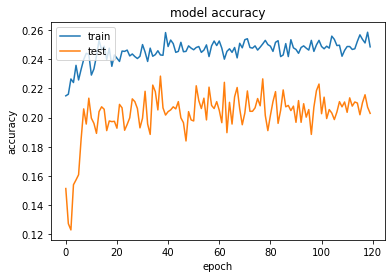

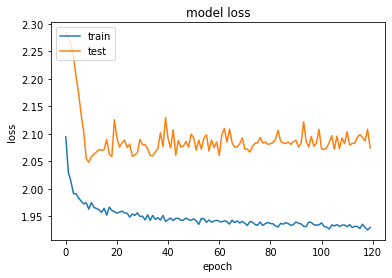

In [13]:
# summarize history for accuracy
plt.plot(model_chroma_stft.history['accuracy'])
plt.plot(model_chroma_stft.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_chroma_stft.history['loss'])
plt.plot(model_chroma_stft.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [14]:
#Avg Test accuracy and Standart Devision 

In [15]:
train_hist = pd.DataFrame(model_chroma_stft.history)
train_hist

,loss,accuracy,val_loss,val_accuracy
0,2.094570,0.214937,2.284908,0.151429
1,2.030002,0.216048,2.274878,0.127333
2,2.013810,0.226495,2.262936,0.123081
3,1.991465,0.224050,2.241450,0.154028
4,1.991232,0.235830,2.204847,0.157335
...,...,...,...,...
115,1.927807,0.256724,2.098803,0.201984
116,1.935694,0.253612,2.093651,0.210253
117,1.929889,0.251167,2.087101,0.215686
118,1.925317,0.258502,2.108420,0.207182


In [16]:
print(train_hist["val_accuracy"].describe())

count    120.000000
mean       0.202392
std        0.016091
min        0.123081
25%        0.197673
50%        0.205292
75%        0.210725
max        0.228443
Name: val_accuracy, dtype: float64


In [17]:
#checking part

In [19]:
test_hist_avg = pd.DataFrame(model_chroma_stft.history).mean()
test_hist_avg

loss            1.946833
accuracy        0.245756
val_loss        2.091096
val_accuracy    0.202392
dtype: float64

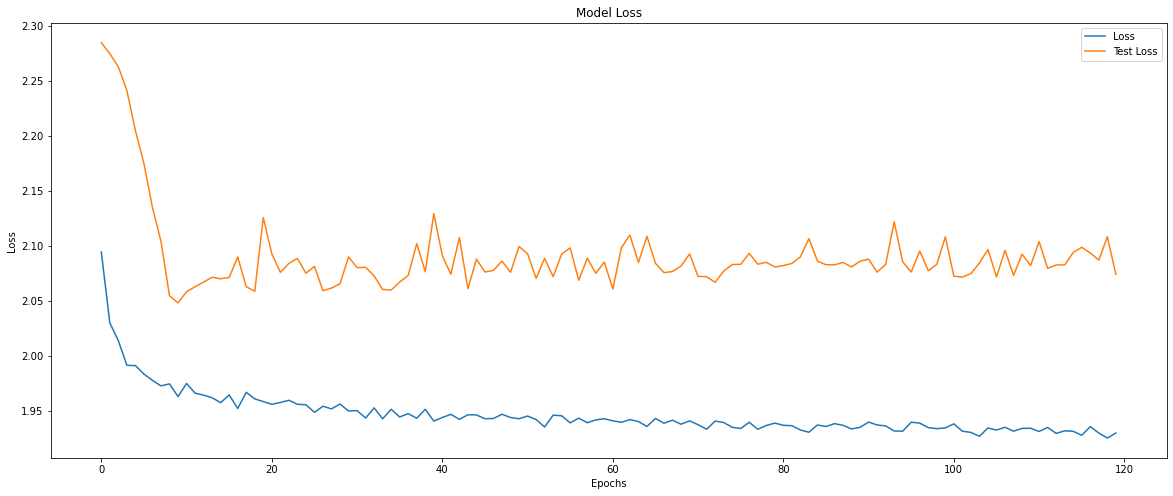

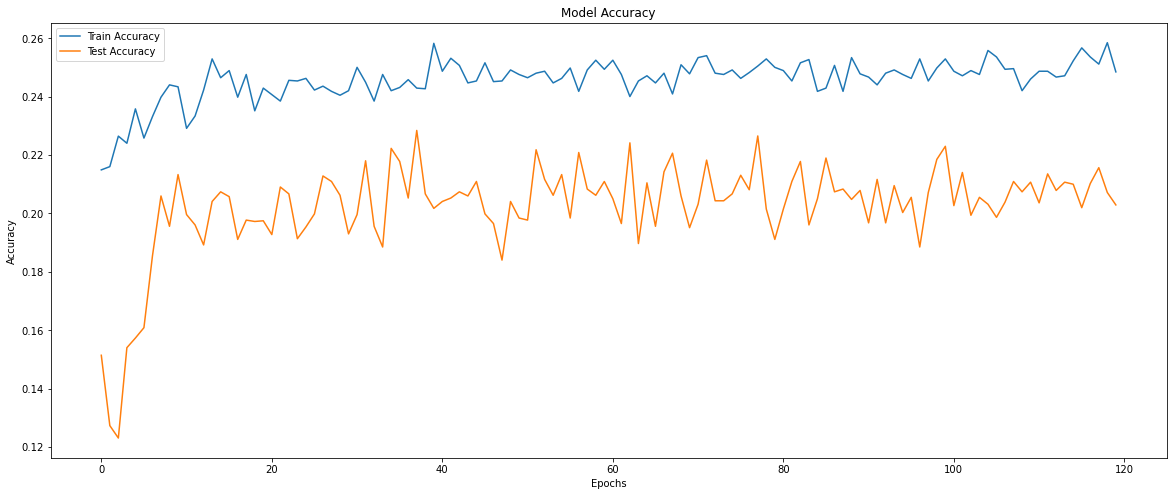

In [20]:
plt.figure(figsize=(20,8))
plt.plot(train_hist[['loss','val_loss']])
plt.legend(['Loss','Test Loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.figure(figsize=(20,8))
plt.plot(train_hist[['accuracy','val_accuracy']])
plt.legend(['Train Accuracy','Test Accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [21]:
ytrue = np.argmax(y_test,axis=1)
ypred = np.argmax(model.predict(X_test),axis=1)
print('\nConfusion Matrix :\n\n')
print(confusion_matrix(ytrue,ypred))
print('\n\nClassification Report : \n\n',classification_report(ytrue,ypred))


Confusion Matrix :


[[ 79   0   0  46  61  51   0 142  34  87]
 [  0   0   0  80  10  11   0  11  54  55]
 [  4   0   0 158  74  46   0 107  13  98]
 [  0   0   0 181  64  49   0  71  33 102]
 [  4   0   0  47  78  54   2 234   8  73]
 [ 30   0   0  90  95  31   3 194   3  37]
 [ 29   0   0   6   4  11  14 116   3   1]
 [ 26   0   0  31  72  46   3 227   5  42]
 [  1   0   0  97  43  14   0  29 121  88]
 [  0   0   0 221  21  32   0  23  75 128]]


Classification Report : 

               precision    recall  f1-score   support

           0       0.46      0.16      0.23       500
           1       0.00      0.00      0.00       221
           2       0.00      0.00      0.00       500
           3       0.19      0.36      0.25       500
           4       0.15      0.16      0.15       500
           5       0.09      0.06      0.07       483
           6       0.64      0.08      0.14       184
           7       0.20      0.50      0.28       452
           8       0.35      0.

C:\Users\fatma.er\Anaconda3\envs\Mylovelyproject\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fatma.er\Anaconda3\envs\Mylovelyproject\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fatma.er\Anaconda3\envs\Mylovelyproject\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta